In [1]:
#!pip install wget
#!pip install urllib3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from datetime import datetime,timedelta
import pytz 
from collections import OrderedDict

from urllib.request import urlopen
import copy
import collections

In [17]:
#!git clone https://github.com/CovidToday/backend

In [2]:
if os.path.exists("test.json"):
  os.remove("test.json")
wget.download('https://api.covid19india.org/v3/data-all.json', os.path.join(os.getcwd(),'test.json')) #os.path.join instead of concating string together

100% [........................................................................] 47235086 / 47235086

'C:\\Users\\patel\\Desktop\\Covid_Today\\backend\\state_data\\test.json'

In [13]:
def convert(dat): 
    return datetime.strptime(dat, '%Y-%m-%d').strftime('%d %B')

In [14]:
json.load(open('test.json')).keys()

dict_keys(['2020-01-30', '2020-02-02', '2020-02-03', '2020-02-14', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-

In [15]:
dt = '2020-05-30'
convert(dt)

'30 May'

In [16]:
# maybe helpful 

def split_date_json(pos_rate_json,state):
  td =  pd.DataFrame(pos_rate_json[state]['dates'])
  
  df = td.apply(lambda x: [x[0][:3],x[0][3:]],  result_type="expand",axis=1)
  df.columns=['date','month']
  return df

In [17]:
#dataset=pd.read_csv('https://raw.githubusercontent.com/CovidToday/backend/master/testing-and-cfr/population.csv')
dataset=pd.read_csv('population.csv')
population=pd.DataFrame()
population["State"]=dataset['State'][:37]
population["Population"]=dataset['Population'][:37]
population=population.set_index('State')

In [18]:
state_id = {
  "TT":"India",
  "MH":"Maharashtra",
  "TN":"Tamil Nadu",
  "DL":"Delhi",
  "GJ":"Gujarat",
  "RJ":"Rajasthan",
  "UP":"Uttar Pradesh",
  "MP":"Madhya Pradesh",
  "WB":"West Bengal",
  "KA":"Karnataka",
  "BR":"Bihar",
  "AP":"Andhra Pradesh",
  "HR":"Haryana",
  "TG":"Telangana",
  "JK":"Jammu and Kashmir",
  "OR":"Odisha",
  "PB":"Punjab",
  "AS":"Assam",
  "KL":"Kerala",
  "UT":"Uttarakhand",
  "JH":"Jharkhand",
  "CT":"Chhattisgarh",
  "TR":"Tripura",
  "HP":"Himachal Pradesh",
  "CH":"Chandigarh",
  "GA":"Goa",
  "MN":"Manipur",
  "NL":"Nagaland",
  "PY":"Puducherry",
  "LA":"Ladakh",
  "AR":"Arunachal Pradesh",
  "AN":"Andaman and Nicobar Islands",
  "ML":"Meghalaya",
  "MZ":"Mizoram",
  "DN":"Dadra and Nagar Haveli and Daman and Diu",
  "SK":"Sikkim",
}

In [19]:
#Changed

'''
from datetime import timedelta
start=datetime.now()
x1=datetime.now(pytz.timezone('Asia/Kolkata')).date()
#x1 = datetime.today()
#y1 = timedelta(days=7)
y1=[]
#x1=str(x1)[:10]
for i in range(7,0,-1):
  y1.append(str(datetime.today()-timedelta(days=i))[:10])
#print(y1)
##y1=str(y1)[:10]
t=y1
t
'''
def dates_gen(periods=7):
  t = pd.Series(pd.date_range(end = datetime.now(pytz.timezone('Asia/Kolkata'))-timedelta(1), periods = periods)).dt.strftime('%Y-%m-%d').tolist()

  return t

In [20]:
t=dates_gen()

In [21]:
from datetime import datetime
x=datetime.today()
dd=pd.date_range(start="2020-01-30",end=x)
dates=[]
for i in range(len(dd)):
  dates.append((str(dd[i])[:10]))
#dates
dates1=[]
for w in range (len(dates)):
  if len(dates[w]):
    dates1.append(convert(dates[w]))

In [22]:
dates[-1]

'2020-10-03'

# Positive Rate (All metrics)



## GroundZero

In [23]:
'''
start=datetime.now()
states={}

csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]

csv_daily_case_per_million = []
csv_daily_test_per_million = []
csv_daily_test_ma = []
csv_daily_deceased_ma = []


test=json.load(open('test.json'))

for j in state_id.keys():
  print("Working : ",state_id[j])
  test_per_million=['']*len(dates)
  pos_cum=['']*len(dates)
  pos_rate_cum=['']*len(dates)
  daily_pos=['']*len(dates)
  daily_pos_ma=['']*len(dates)
  daily_tested=['']*len(dates)
  daily_pos_rate=['']*len(dates)
  daily_pos_rate_ma=['']*len(dates)
  tested_cum=['']*len(dates)
  tested_daily=['']*len(dates)
  deceased_cum=['']*len(dates)
  daily_deceased=['']*len(dates)
  recovered_cum=['']*len(dates)
  daily_recovered=['']*len(dates)    
  
  daily_case_per_million = ['']*len(dates)
  daily_test_per_million = ['']*len(dates)
  daily_test_ma = ['']*len(dates)
  daily_deceased_ma = ['']*len(dates)
    
  for i in range(len(dates)):
    if dates[i] in test.keys():
        temp=test[dates[i]]
    
        if j in temp.keys():
          if 'total' in temp[j].keys():
            if 'confirmed' in temp[j]['total'].keys():
              pos_cum[i]=temp[j]['total']['confirmed']

            if 'tested' in temp[j]['total'].keys():
              tested_cum[i]=abs(temp[j]['total']['tested'])
              test_per_million[i]=temp[j]['total']['tested']*1000000/int(population["Population"][state_id[j]])

            if 'deceased' in temp[j]['total'].keys():
              deceased_cum[i]=temp[j]['total']['deceased']

            if 'recovered' in temp[j]['total'].keys():
              recovered_cum[i]=temp[j]['total']['recovered']

            if len(str(pos_cum[i])) and len(str(tested_cum[i])):
              pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]

          if 'delta' in temp[j].keys():
            if 'confirmed' in temp[j]['delta'].keys():
              daily_pos[i]=temp[j]['delta']['confirmed']
              daily_case_per_million[i] =temp[j]['delta']['confirmed']*1000000/int(population["Population"][state_id[j]])   #New

            if 'tested' in temp[j]['delta'].keys():
              daily_tested[i]=abs(temp[j]['delta']['tested'])
              daily_test_per_million[i] = temp[j]['delta']['tested']*1000000/int(population["Population"][state_id[j]])    #New

            if 'deceased' in temp[j]['delta'].keys():
              daily_deceased[i]=temp[j]['delta']['deceased']

            if 'recovered' in temp[j]['delta'].keys():
              daily_recovered[i]=temp[j]['delta']['recovered']

            if len(str(daily_pos[i])) and len(str(daily_tested[i])):
              daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])

  for w in range(7,len(daily_pos)):
    sum1=0
    sum2=0
    for s in range(7):
      if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
        sum1+=int(daily_pos[w-s])
        sum2+=int(daily_tested[w-s])
    if (sum2!=0):
      daily_pos_rate_ma[w]=sum1*100/abs(sum2)
  
  for w in range(7,len(daily_pos)):
    sum1=0
    count=0
    for s in range(7):
      if (len(str(daily_pos[w-s]))!=0):
        sum1+=int(daily_pos[w-s])
        count+=1
    if count!=0:
      daily_pos_ma[w]=sum1/count
    
  #New
    for w in range(7,len(daily_tested)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_tested[w-s])
        
          count+=1
      if count!=0:
        daily_test_ma[w]=sum1/count
        
    #New
    for w in range(7,len(daily_deceased)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_deceased[w-s]))!=0):
          sum1+=int(daily_deceased[w-s])
          count+=1
      if count!=0:
        daily_deceased_ma[w]=sum1/count

  st=state_id[j]

  for i in range(len(dates)-1):
    csv_dates.append(dates1[i])
    csv_states.append(st)
    csv_total_cases.append(pos_cum[i])
    csv_positivity_rate_cumulative.append(pos_rate_cum[i])
    csv_daily_positive_cases.append(daily_pos[i])
    csv_cum_recovered.append(recovered_cum[i])
    csv_daily_recovered.append(daily_recovered[i])
    csv_cum_deceased.append(deceased_cum[i])
    csv_daily_deceased.append(daily_deceased[i])
    csv_daily_positivity_rate.append(daily_pos_rate[i])
    csv_daily_positive_cases_ma.append(daily_pos_ma[i])
    csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
    csv_daily_tested.append(daily_tested[i])
    csv_cum_tested.append(tested_cum[i])
    csv_test_per_million.append(test_per_million[i])
    
    #New
    csv_daily_case_per_million.append(daily_case_per_million[i])
    csv_daily_test_per_million.append(daily_test_per_million[i])
    csv_daily_test_ma.append(daily_test_ma[i])
    csv_daily_deceased_ma.append(daily_deceased_ma[i])

  states[st]={
                    'dates':dates1[:-1],
                    'cum_positive_cases':pos_cum[:-1],
                    'cum_positivity_rate':pos_rate_cum[:-1],
                    'daily_positive_cases':daily_pos[:-1],
                    'cum_recovered':recovered_cum[:-1],
                    'daily_recovered':daily_recovered[:-1],
                    'cum_deceased':deceased_cum[:-1],
                    'daily_deceased':daily_deceased[:-1],
                    'daily_positivity_rate':daily_pos_rate[:-1],
                    'daily_positive_cases_ma': daily_pos_ma[:-1],
                    'daily_positivity_rate_ma':daily_pos_rate_ma[:-1] , 
                    'daily_tests': daily_tested[:-1],
                    'cum_tests': tested_cum[:-1],
                    'test_per_million':test_per_million[:-1],    
                    #New
                    'daily_cases_per_million':daily_case_per_million[:-1],
                    'daily_tests_per_million':daily_test_per_million[:-1],
                    'daily_tests_ma':daily_test_ma[:-1],
                    'daily_deceased_ma':daily_deceased_ma[:-1]

                   }
      
states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
with open('positivity_Rate_new.json', 'w') as outfile:
  json.dump(states, outfile,indent=4)
'''

'\nstart=datetime.now()\nstates={}\n\ncsv_dates=[]\ncsv_states=[]\ncsv_total_cases=[]\ncsv_cum_recovered=[]\ncsv_daily_recovered=[]\ncsv_cum_deceased=[]\ncsv_daily_deceased=[]\ncsv_positivity_rate_cumulative=[]\ncsv_daily_positive_cases=[]\ncsv_daily_positivity_rate=[]\ncsv_daily_positive_cases_ma=[]\ncsv_daily_positivity_rate_ma=[]\ncsv_test_per_million=[]\ncsv_daily_tested=[]\ncsv_cum_tested=[]\n\ncsv_daily_case_per_million = []\ncsv_daily_test_per_million = []\ncsv_daily_test_ma = []\ncsv_daily_deceased_ma = []\n\n\ntest=json.load(open(\'test.json\'))\n\nfor j in state_id.keys():\n  print("Working : ",state_id[j])\n  test_per_million=[\'\']*len(dates)\n  pos_cum=[\'\']*len(dates)\n  pos_rate_cum=[\'\']*len(dates)\n  daily_pos=[\'\']*len(dates)\n  daily_pos_ma=[\'\']*len(dates)\n  daily_tested=[\'\']*len(dates)\n  daily_pos_rate=[\'\']*len(dates)\n  daily_pos_rate_ma=[\'\']*len(dates)\n  tested_cum=[\'\']*len(dates)\n  tested_daily=[\'\']*len(dates)\n  deceased_cum=[\'\']*len(dates)\

## Append

In [24]:

csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]

#New
csv_daily_case_per_million = []
csv_daily_test_per_million = []
csv_daily_test_ma = []
csv_daily_deceased_ma = []
'''
#Proposed method

test_json_url = 'https://api.covid19india.org/v3/data-all.json'
test_json = json.loads(urlopen(test_json_url).read())

posrat_json_url = 'https://raw.githubusercontent.com/CovidToday/backend/master/testing-and-cfr/positivity_Rate.json'
posrat_json = json.loads(urlopen(posrat_json_url).read())


test =test_json
temp1 = posrat_json

'''
#Old method

#test_json_url = 'https://api.covid19india.org/v3/data-all.json'
#test_json = json.loads(urlopen(test_json_url).read())

#test = test_json
test = json.load(open('test.json'))
temp1 = json.load(open('positivity_Rate.json'))


for date in t:  
 
  states={}
  temp = test[date]
  

  for i,j in enumerate(state_id.keys()):
    k = state_id[j]
    #print('posrate() -- Working : ',state_id[j])

    test_per_million = temp1[k]['test_per_million']
    pos_cum = temp1[k]['cum_positive_cases']
    pos_rate_cum = temp1[k]['cum_positivity_rate']
    daily_pos = temp1[k]['daily_positive_cases']
    daily_pos_ma = temp1[k]['daily_positive_cases_ma']
    daily_pos_rate = temp1[k]['daily_positivity_rate']
    daily_pos_rate_ma = temp1[k]['daily_positivity_rate_ma']
    tested_cum = temp1[k]['cum_tests']
    daily_tested = temp1[k]['daily_tests']
    deceased_cum = temp1[k]['cum_deceased']
    daily_deceased = temp1[k]['daily_deceased']
    recovered_cum = temp1[k]['cum_recovered']
    daily_recovered = temp1[k]['daily_recovered'] 
    
    
    
    #New added
    daily_case_per_million  = temp1[k]['daily_cases_per_million']
    daily_test_per_million  = temp1[k]['daily_tests_per_million']
    daily_test_ma  = temp1[k]['daily_tests_ma']
    daily_deceased_ma  = temp1[k]['daily_deceased_ma']
  
    dates=temp1[k]['dates']

    if convert(date) not in dates :
      print(1)
      dates.append(convert(date))
      test_per_million.append('')
      pos_cum.append('')
      pos_rate_cum.append('')
      daily_pos.append('')
      daily_pos_ma.append('')
      daily_pos_rate.append('')
      daily_pos_rate_ma.append('')
      tested_cum.append('')
      daily_tested.append('')
      deceased_cum.append('')
      daily_deceased.append('')
      recovered_cum.append('')
      daily_recovered.append('')
      
      #New added
      print("Appends")
      daily_case_per_million.append('')
      daily_test_per_million.append('')
      daily_test_ma.append('')
      daily_deceased_ma.append('')

      i=len(dates)-1
      
    for l in range(len(dates)):
      if convert(date)==dates[l]:
        i=l
        break
    

    if k in temp1.keys():
        if 'total' in temp[j].keys():
          if 'confirmed' in temp[j]['total'].keys():
            pos_cum[i]=temp[j]['total']['confirmed']

          if 'tested' in temp[j]['total'].keys():
            tested_cum[i]=abs(temp[j]['total']['tested'])
            test_per_million[i]=temp[j]['total']['tested']*1000000/int(population["Population"][k])
              
          if 'deceased' in temp[j]['total'].keys():
            deceased_cum[i]=temp[j]['total']['deceased']
          
          if 'recovered' in temp[j]['total'].keys():
            recovered_cum[i]=temp[j]['total']['recovered']
          
          if len(str(pos_cum[i])) and len(str(tested_cum[i])):
            pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]

        if 'delta' in temp[j].keys():
          if 'confirmed' in temp[j]['delta'].keys():
            daily_pos[i]=temp[j]['delta']['confirmed']
            daily_case_per_million[i] =temp[j]['delta']['confirmed']*1000000/int(population["Population"][k])   #New

          if 'tested' in temp[j]['delta'].keys():
            daily_tested[i]=abs(temp[j]['delta']['tested'])
            daily_test_per_million[i] = temp[j]['delta']['tested']*1000000/int(population["Population"][k])    #New

          if 'deceased' in temp[j]['delta'].keys():
            daily_deceased[i]=temp[j]['delta']['deceased']
          
          if 'recovered' in temp[j]['delta'].keys():
            daily_recovered[i]=temp[j]['delta']['recovered']
          
          if len(str(daily_pos[i])) and len(str(daily_tested[i])):
            daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])
    
   
    for w in range(7,len(daily_pos)):
      sum1=0
      sum2=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          sum2+=int(daily_tested[w-s])
      if (sum2!=0):
        daily_pos_rate_ma[w]=sum1*100/abs(sum2)
    
    for w in range(7,len(daily_pos)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          count+=1
      if count!=0:
        daily_pos_ma[w]=sum1/count
  
    #New
    for w in range(7,len(daily_tested)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_tested[w-s])
        
          count+=1
      if count!=0:
        daily_test_ma[w]=sum1/count
        
    #New
    for w in range(7,len(daily_deceased)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_deceased[w-s]))!=0):
          sum1+=int(daily_deceased[w-s])
          count+=1
      if count!=0:
        daily_deceased_ma[w]=sum1/count
   
    
    #print(len)
    st=state_id[j]
    for i in range(len(dates)):
      '''
      if i  == len(dates)//4:
        print("Progress : 25%")
      if i  == len(dates)//2:
        print("Progress : 50%")
      if i  == (len(dates)*3)//4:
        print("Progress : 75%")  
      if i  == len(dates)-1:
        print("Progres : 100&")
      '''
      csv_dates.append(dates[i])
      csv_states.append(st)
      csv_total_cases.append(pos_cum[i])
      csv_positivity_rate_cumulative.append(pos_rate_cum[i])
      csv_daily_positive_cases.append(daily_pos[i])
      csv_cum_recovered.append(recovered_cum[i])
      csv_daily_recovered.append(daily_recovered[i])
      csv_cum_deceased.append(deceased_cum[i])
      csv_daily_deceased.append(daily_deceased[i])
      csv_daily_positivity_rate.append(daily_pos_rate[i])
      csv_daily_positive_cases_ma.append(daily_pos_ma[i])
      csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
      csv_daily_tested.append(daily_tested[i])
      csv_cum_tested.append(tested_cum[i])
      csv_test_per_million.append(test_per_million[i])

      #New
      csv_daily_case_per_million.append(daily_case_per_million[i])
      csv_daily_test_per_million.append(daily_test_per_million[i])
      csv_daily_test_ma.append(daily_test_ma[i])
      csv_daily_deceased_ma.append(daily_deceased_ma[i])
    
    #print(st)
    states[st]={
                    'dates':dates,
                    'cum_positive_cases':pos_cum,
                    'cum_positivity_rate':pos_rate_cum,
                    'daily_positive_cases':daily_pos,
                    'cum_recovered':recovered_cum,
                    'daily_recovered':daily_recovered,
                    'cum_deceased':deceased_cum,
                    'daily_deceased':daily_deceased,
                    'daily_positivity_rate':daily_pos_rate,
                    'daily_positive_cases_ma': daily_pos_ma,
                    'daily_positivity_rate_ma':daily_pos_rate_ma , 
                    'daily_tests': daily_tested,
                    'cum_tests': tested_cum,
                    'test_per_million':test_per_million,
                    #New
                    'daily_cases_per_million':daily_case_per_million,
                    'daily_tests_per_million':daily_test_per_million,
                    'daily_tests_ma':daily_test_ma,
                    'daily_deceased_ma':daily_deceased_ma

                   }
      
states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
with open('positivity_Rate.json', 'w') as outfile:
    json.dump(states, outfile,indent=4)

In [25]:
dates

['30 January',
 '31 January',
 '01 February',
 '02 February',
 '03 February',
 '04 February',
 '05 February',
 '06 February',
 '07 February',
 '08 February',
 '09 February',
 '10 February',
 '11 February',
 '12 February',
 '13 February',
 '14 February',
 '15 February',
 '16 February',
 '17 February',
 '18 February',
 '19 February',
 '20 February',
 '21 February',
 '22 February',
 '23 February',
 '24 February',
 '25 February',
 '26 February',
 '27 February',
 '28 February',
 '29 February',
 '01 March',
 '02 March',
 '03 March',
 '04 March',
 '05 March',
 '06 March',
 '07 March',
 '08 March',
 '09 March',
 '10 March',
 '11 March',
 '12 March',
 '13 March',
 '14 March',
 '15 March',
 '16 March',
 '17 March',
 '18 March',
 '19 March',
 '20 March',
 '21 March',
 '22 March',
 '23 March',
 '24 March',
 '25 March',
 '26 March',
 '27 March',
 '28 March',
 '29 March',
 '30 March',
 '31 March',
 '01 April',
 '02 April',
 '03 April',
 '04 April',
 '05 April',
 '06 April',
 '07 April',
 '08 April',

In [26]:
len(pos_cum)

247

In [27]:
dates[-1]

'02 October'

In [28]:
csv_dates[-1]

'02 October'

In [30]:
n_states = len(state_id.keys())
n_dates = len(dates)

rows = n_states*n_dates

rows

8892

# CSV

In [31]:
n_states = len(state_id.keys())
n_dates = len(dates)

rows = n_states*n_dates


df=pd.DataFrame()
df['dates']=csv_dates[:rows]
df['state']=csv_states[:rows]
df['cum_positive_cases']=csv_total_cases[:rows]
df['cum_positivity_rate']=csv_positivity_rate_cumulative[:rows]

df['cum_recovered']=csv_cum_recovered[:rows]
df['daily_recovered']:csv_daily_recovered[:rows]
df['cum_deceased']=csv_cum_deceased[:rows]
df['daily_deceased']=csv_daily_deceased[:rows]
df['daily_positive_cases']=csv_daily_positive_cases[:rows]
df['daily_positivity_rate']=csv_daily_positivity_rate[:rows]
df['daily_positive_cases_ma']=csv_daily_positive_cases_ma[:rows]
df['daily_positivity_rate_ma']=    csv_daily_positivity_rate_ma[:rows]
df['daily_tests']=csv_daily_tested[:rows]
df['cum_tested']=csv_cum_tested[:rows]
df['test_per_million']=csv_test_per_million[:rows]

#New
df['daily_cases_per_million'] = csv_daily_case_per_million[:rows]
df['daily_tests_per_million'] = csv_daily_test_per_million[:rows]
df['daily_tests_ma'] = csv_daily_test_ma[:rows]
df['daily_deceased_ma'] = csv_daily_deceased_ma[:rows]

df.to_csv('positivity_Rate_new.csv',index=False)

df_to_concat = copy.deepcopy(df)

In [32]:
df.columns

Index(['dates', 'state', 'cum_positive_cases', 'cum_positivity_rate',
       'cum_recovered', 'cum_deceased', 'daily_deceased',
       'daily_positive_cases', 'daily_positivity_rate',
       'daily_positive_cases_ma', 'daily_positivity_rate_ma', 'daily_tests',
       'cum_tested', 'test_per_million', 'daily_cases_per_million',
       'daily_tests_per_million', 'daily_tests_ma', 'daily_deceased_ma'],
      dtype='object')

In [33]:
df[df['state']=='India']

,dates,state,cum_positive_cases,cum_positivity_rate,cum_recovered,cum_deceased,daily_deceased,daily_positive_cases,daily_positivity_rate,daily_positive_cases_ma,daily_positivity_rate_ma,daily_tests,cum_tested,test_per_million,daily_cases_per_million,daily_tests_per_million,daily_tests_ma,daily_deceased_ma
0,30 January,India,1,,,,,1,,,,,,,0.000729203,,,
1,31 January,India,,,,,,,,,,,,,,,,
2,01 February,India,,,,,,,,,,,,,,,,
3,02 February,India,2,,,,,1,,,,,,,0.000729203,,,
4,03 February,India,3,,,,,1,,,,,,,0.000729203,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,28 September,India,6143019,8.40243,5098583,96351,775,69668,6.0962,83271.4,7.48819,1142811,73110041,53312.1,50.8021,833.341,1.11204e+06,1054.86
243,29 September,India,6223519,8.38786,5184733,97529,1178,80500,7.40783,82862.6,7.32624,1086688,74196729,54104.5,58.7008,792.416,1.13104e+06,1068.14
244,30 September,India,6310267,8.34473,5270007,98708,1179,86748,6.09591,82869,7.08823,1423052,75619781,55142.2,63.2569,1037.69,1.16911e+06,1076.14
245,01 October,India,6392051,8.33191,5348738,99807,1099,81784,7.44881,82278,7.39408,1097947,76717728,55942.8,59.6371,800.626,1.11276e+06,1069.71


# CFR

In [34]:
#dates = np.array([pd.to_datetime(i['date']) for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
#print(dates)
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()

for s in state_id.keys():
    st=state_id[s]
    data_confirmed[st] = np.array(states[st]['daily_positive_cases'])
    data_deceased[st] = np.array(states[st]['daily_deceased'])
    data_recovered[st] = np.array(states[st]['daily_recovered'])

In [35]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

In [36]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

In [ ]:
json_data={}
cfr = pd.DataFrame()
final=pd.DataFrame
plt.figure(1, figsize=(15, 7))
for st in state_id.keys():
    print("cfr() -- Working : ",state_id[st])

    state=state_id[st]
    boots = 100
    conf = []
    for n in range(boots):
        if n  == boots//4:
          print("Progress : 25%")
        if n  == boots//2:
          print("Progress : 50%")
        if n  == (boots*3)//4:
          print("Progress : 75%")  
        if n  == boots-1:
          print("Progress : 100%")

        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    #temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    dates = states[state]['dates']
    temp = {
        'dates':dates,
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=state_id[st]
    #print(a)
    states[state].update(temp)
    json_data[state] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=[str(a)]*len(dates)
    cfr_state['dates']=dates
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [ ]:
cfr.to_csv('cfr.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))

In [ ]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr.json", "w") as outfile: 
    outfile.write(json_data_indented)

# Doubling Rate

In [37]:
def calc_doublingtimes(x):
    vals = []
    for i in range(x.shape[0]):
        for j in range(i+1,x.shape[0]):
            if len(str(x[j])) and len(str(x[i])):
                vals.append(np.log(2)*(j-i)/np.log(int(x[j])/int(x[i])))
    if not vals:
        return 0,0,0
    return np.median(vals),np.quantile(vals,0.025),np.quantile(vals,0.975)

In [38]:
start=datetime.now()
x=datetime.now(pytz.timezone('Asia/Kolkata')).date()
dd=pd.date_range(start="2020-01-30",end=x)
datess=[]
for i in range(len(dd)):
  datess.append((str(dd[i])[:10]))

In [39]:
dates1=[]
for w in range (len(dates)):
  if len(dates[w]):
    dates1.append(convert(datess[w]))

In [40]:
json_data={}

#test_json_url = 'https://api.covid19india.org/v3/data-all.json'
#test_json = json.loads(urlopen(test_json_url).read())
test= json.load(open('test.json'))

for j in state_id.keys():
    cumul=['']*len(dates)
    st=state_id[j]
    cumul=states[st]['cum_positive_cases']

    cumul_cases=np.array(cumul)
    dbt = np.zeros((3,cumul_cases.shape[0]))
    for i in range(cumul_cases.shape[0]):
        dbt[:,i] = calc_doublingtimes(cumul_cases[i-7:i])
    st=state_id[j]
    json_data[st] = {
            'dates':dates1,
            'dbt_point':pd.Series((list(dbt[0,:]))).replace([np.inf, -np.inf], np.nan).fillna('').tolist(),
            'dbt_l95':pd.Series((list(dbt[1,:]))).replace([np.inf, -np.inf], np.nan).fillna('').tolist(),
            'dbt_u95':pd.Series((list(dbt[2,:]))).replace([np.inf, -np.inf], np.nan).fillna('').tolist()
            }
    states[st].update(json_data[st])

<ipython-input-37-2831df82c1a8>:6: RuntimeWarning: divide by zero encountered in double_scalars
  vals.append(np.log(2)*(j-i)/np.log(int(x[j])/int(x[i])))
c:\users\patel\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


# Rt Calculation

In [41]:
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for s in state_id.keys():
    st=state_id[s]
    data_confirmed[st] = np.array(states[st]['daily_positive_cases'])
    data_deceased[st] = np.array(states[st]['daily_deceased'])
    data_recovered[st] = np.array(states[st]['daily_recovered'])

In [42]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

Working :  India


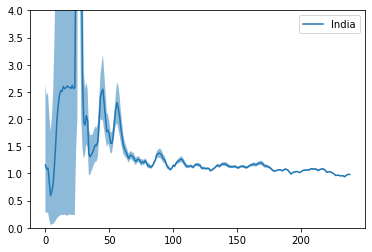

Working :  Maharashtra


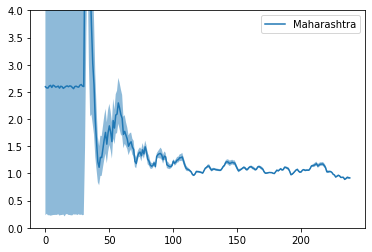

Working :  Tamil Nadu


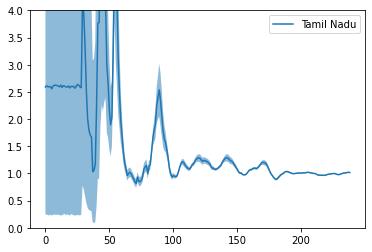

Working :  Delhi


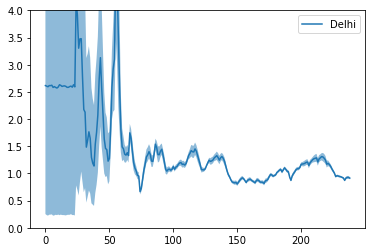

Working :  Gujarat


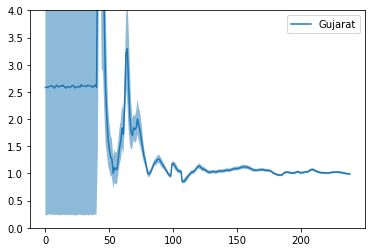

Working :  Rajasthan


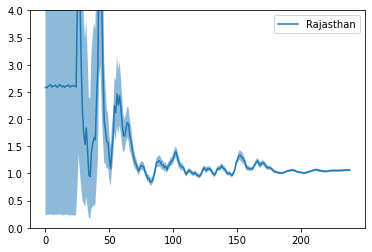

Working :  Uttar Pradesh


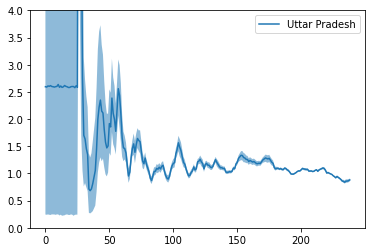

Working :  Madhya Pradesh


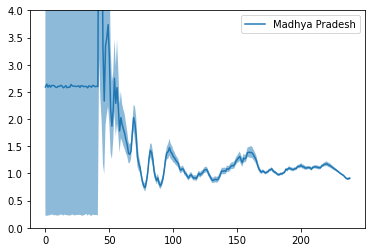

Working :  West Bengal


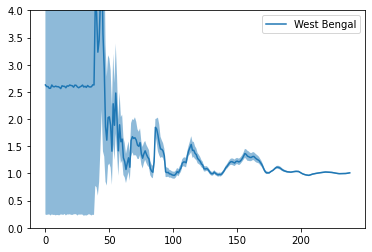

Working :  Karnataka


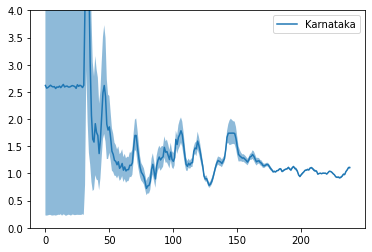

Working :  Bihar


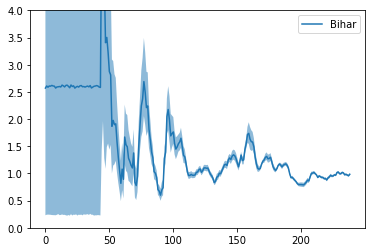

Working :  Andhra Pradesh


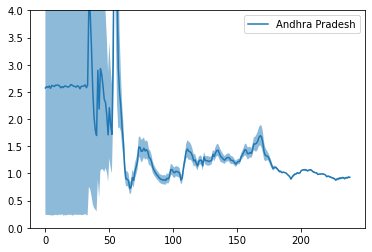

Working :  Haryana


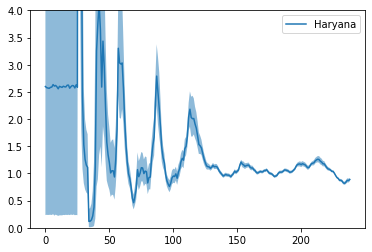

Working :  Telangana


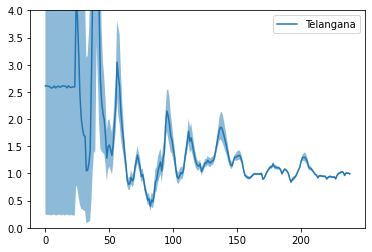

Working :  Jammu and Kashmir


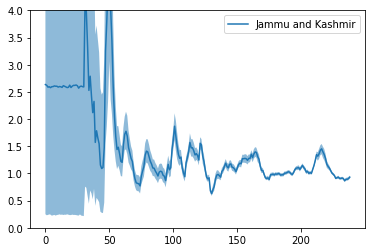

Working :  Odisha


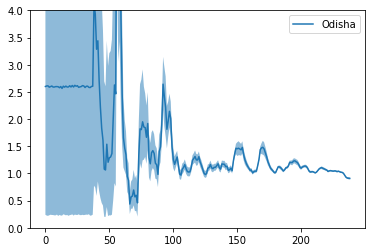

Working :  Punjab


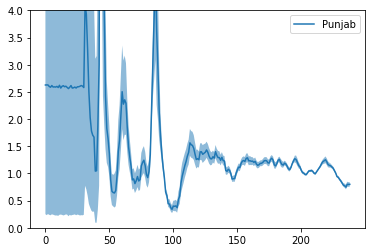

Working :  Assam


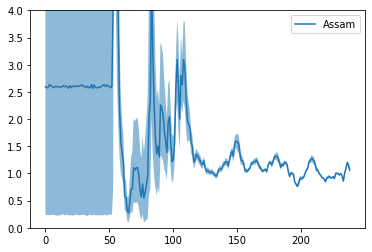

Working :  Kerala


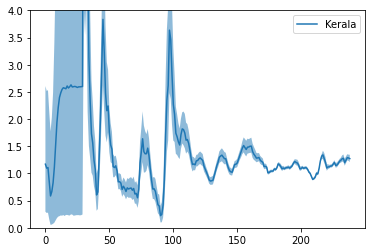

Working :  Uttarakhand


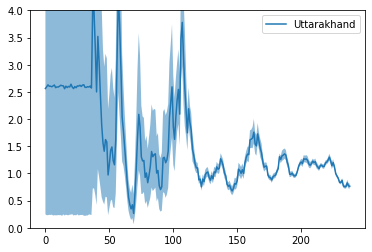

Working :  Jharkhand


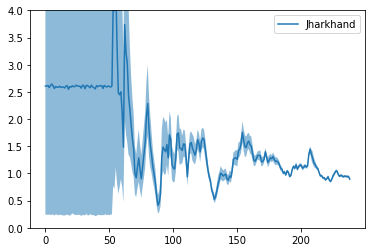

Working :  Chhattisgarh


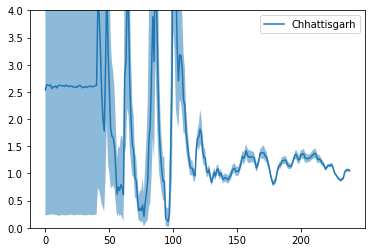

Working :  Tripura


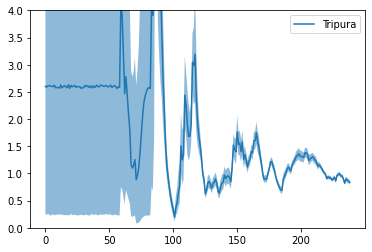

Working :  Himachal Pradesh


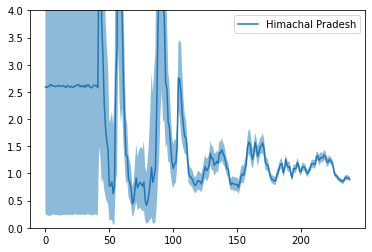

Working :  Chandigarh


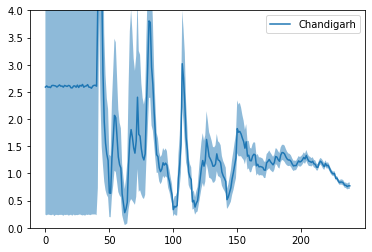

Working :  Goa


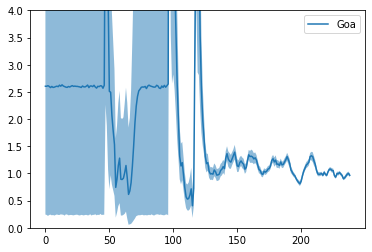

Working :  Manipur


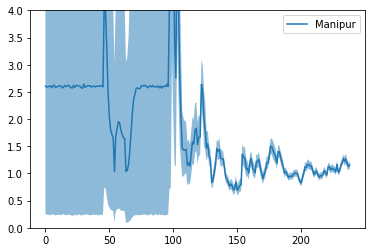

Working :  Nagaland


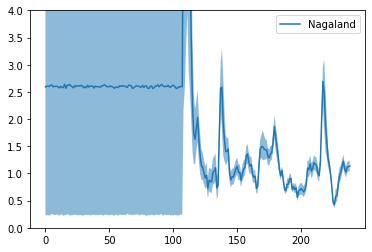

Working :  Puducherry


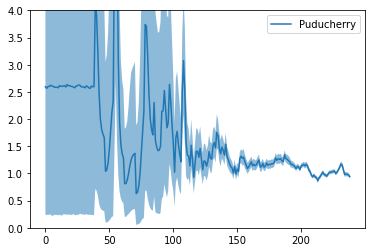

Working :  Ladakh


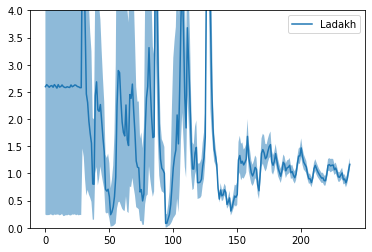

Working :  Arunachal Pradesh


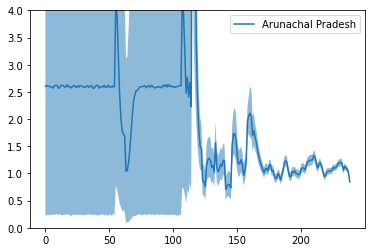

Working :  Andaman and Nicobar Islands


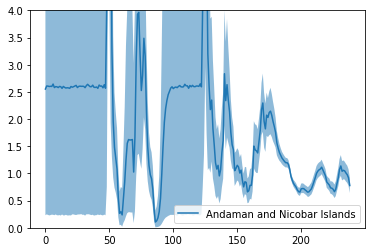

Working :  Meghalaya


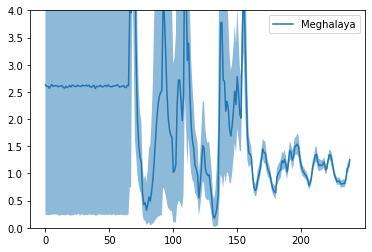

Working :  Mizoram


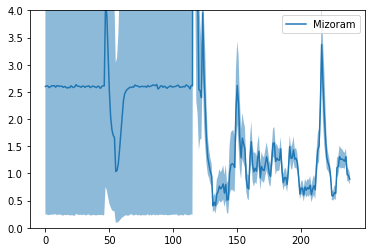

Working :  Dadra and Nagar Haveli and Daman and Diu


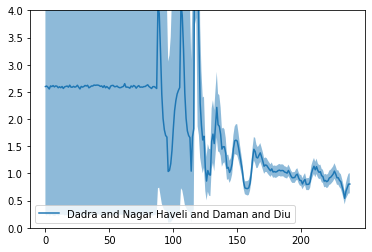

Working :  Sikkim


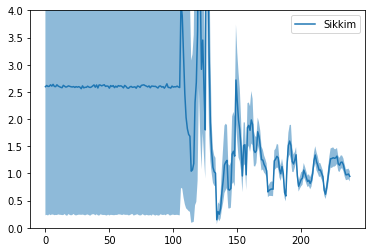

In [43]:
rt_json = {}

rt = pd.DataFrame()
# plt.figure(1, figsize=(15, 7))
for st in list(state_id.keys()):
    state=state_id[st]
    print("Working : ",state)
    
    temp = pd.DataFrame()
    temp["active"] = np.array(data_confirmed[state]).clip(0).tolist()
    temp.to_csv('confirmed.csv')
    
    #os.system("Rscript.exe scripts/Rt_analysis_newGT_TJ.R")  #Changed
    call(['RScript.exe',"scripts/Rt_analysis_newGT_TJ.R"])
    
    values = {

            'rt_point':[],
            'rt_sd':[],
            'rt_l95':[],
            'rt_u95':[],
            'rt_l50':[],
            'rt_u50':[],
            't_end':[]
            }
    for df in [pd.read_csv('rt_temp/'+temp) for temp in os.listdir('rt_temp/')]:
        values['rt_point'].append(df['Mean(R)'])
        values['rt_sd'].append(df['Std(R)'])
        values['rt_l95'].append(df['Quantile.0.025(R)'])
        values['rt_u95'].append(df['Quantile.0.975(R)'])
        values['rt_l50'].append(df['Quantile.0.25(R)'])
        values['rt_u50'].append(df['Quantile.0.75(R)'])
        values['t_end'].append(df['t_end']-1)
    for i in values:
        values[i] = np.median(values[i],axis=0)
    values['dates'] = list(data_confirmed['date'][values['t_end']-1])
    rt_state=pd.DataFrame()
    rt_state['state']=[str(state)]*len(values['dates'])
    rt_state['dates']= values['dates']
    rt_state['rt_point'] = values['rt_point']
    rt_state['rt_sd'] = values['rt_sd']    
    rt_state['rt_l95'] = values['rt_l95']    
    rt_state['rt_u95'] = values['rt_u95']    
    rt_state['rt_l50'] = values['rt_l50']
    rt_state['rt_u50'] = values['rt_u50']
    rt=pd.concat([rt, rt_state])
    
    rt_json[st] = values
    plt.plot(range(len(values['rt_point'])),values['rt_point'],label=state)
    plt.fill_between(range(len(values['rt_point'])),values['rt_l95'],values['rt_u95'],alpha=0.5)
    plt.ylim(0,4)
    plt.legend()
    plt.show()

In [57]:
for st in state_id.keys():
    state = state_id[st]
    states[state].update(rt_json[st])

In [58]:
rt.to_csv('rt.csv',index=False)

In [59]:
len(dates)

247

In [60]:
states['Maharashtra'].keys()

dict_keys(['dates', 'cum_positive_cases', 'cum_positivity_rate', 'daily_positive_cases', 'cum_recovered', 'daily_recovered', 'cum_deceased', 'daily_deceased', 'daily_positivity_rate', 'daily_positive_cases_ma', 'daily_positivity_rate_ma', 'daily_tests', 'cum_tests', 'test_per_million', 'daily_cases_per_million', 'daily_tests_per_million', 'daily_tests_ma', 'daily_deceased_ma', 'dbt_point', 'dbt_l95', 'dbt_u95', 'rt_point', 'rt_sd', 'rt_l95', 'rt_u95', 'rt_l50', 'rt_u50', 't_end'])

##Rt Shifting

In [61]:
def shift_rt_metrics(dict,key,days=9):
  arr = copy.deepcopy(dict[key])
  values_shift = collections.deque(arr)
  values_shift.rotate(-1*days)

  new_val = list(values_shift)

  size = len(dict['dates'])
  
  for i in range(days):
    new_val[size-1-i]=''

  return new_val
 

In [62]:
rt_json_shifted = copy.deepcopy(rt_json)

for st in state_id.keys():
    
    rt_json_shifted[st]['rt_point'] = shift_rt_metrics(rt_json[st],'rt_point',2)
    rt_json_shifted[st]['rt_sd'] = shift_rt_metrics(rt_json[st],'rt_sd',2)
    rt_json_shifted[st]['rt_l95'] = shift_rt_metrics(rt_json[st],'rt_l95',2)
    rt_json_shifted[st]['rt_u95'] = shift_rt_metrics(rt_json[st],'rt_u95',2)
    rt_json_shifted[st]['rt_l50'] = shift_rt_metrics(rt_json[st],'rt_l50',2)
    rt_json_shifted[st]['rt_u50'] = shift_rt_metrics(rt_json[st],'rt_u50',2)
    rt_json_shifted[st]['t_end'] = shift_rt_metrics(rt_json[st],'t_end',2) 


In [63]:
dates[-1]

'02 October'

In [64]:
for st in state_id.keys():
    state = state_id[st]
    leng = len(dates)
    
    #states[state]['dates'] =  temp1['India']['dates']
    for keys in list(rt_json_shifted[st].keys())[:-1]:
        if len(rt_json_shifted[st][keys])<leng:
            rt_json_shifted[st][keys].extend(['' for i in range(leng-len(rt_json_shifted[st][keys]))]) 
                
    rt_json_shifted[st]['dates'] = dates

In [65]:
states_shifted = copy.deepcopy(states)

for st in state_id.keys():
    state = state_id[st]
    states_shifted[state].update(rt_json_shifted[st])

In [66]:
for st in state_id.keys():
    for key in rt_json[st].keys():
      try:
        rt_json[st][key]=rt_json[st][key].tolist()
      except:
        pass


In [67]:
for st in state_id.keys():
    state = state_id[st]
    
    for key in states[state].keys():
      try:
        states[state][key]=states[state][key].tolist()
      except:
        pass


In [68]:
for st in state_id.keys():
    state = state_id[st]
    leng = len(temp1['India']['dates'])
    states[state]['dates'] =  temp1['India']['dates']
    
    for keys in list(states[state].keys())[1:]:
        if len(states[state][keys])<leng:
            states[state][keys].extend(['' for i in range(leng-len(states[state][keys]))]) 

In [69]:
for st in state_id.keys():
    state = state_id[st]
    leng = len(temp1['India']['dates'])
    states_shifted[state]['dates'] =  temp1['India']['dates']
    
    for keys in list(states_shifted[state].keys())[1:]:
        if len(states_shifted[state][keys])<leng:
            states_shifted[state][keys].extend(['' for i in range(leng-len(states_shifted[state][keys]))]) 

## Rt changes for review

In [70]:
with open('rt_shifted.json', 'w') as outfile:
  json.dump(rt_json_shifted, outfile,indent=4)

In [71]:
with open('rt.json', 'w') as outfile:
  json.dump(rt_json, outfile,indent=4)

In [72]:
            
rt_graph = copy.deepcopy(rt_json_shifted)

de =10

for st in state_id.keys():
    
    for k in rt_json_shifted[st].keys():
        rt_graph[st][k] = rt_json_shifted[st][k][:-10]

In [73]:
with open('rt_graph.json', 'w') as outfile:
  json.dump(rt_graph, outfile,indent=4)

In [74]:
'''
vals = min(len(df_to_concat),len(cfr),len(rt))
one = df_to_concat.iloc[:vals]
two = cfr.iloc[:vals]
three = rt.iloc[:vals]
df_list = [one,two]
#df_list = [df_to_concat.iloc[:vals],cfr.iloc[:vals],rt.iloc[:vals]]
all_dataframes = pd.concat([two,three],axis=1)
all_dataframes.to_csv('allmetrics_state.csv',index=False)'''

"\nvals = min(len(df_to_concat),len(cfr),len(rt))\none = df_to_concat.iloc[:vals]\ntwo = cfr.iloc[:vals]\nthree = rt.iloc[:vals]\ndf_list = [one,two]\n#df_list = [df_to_concat.iloc[:vals],cfr.iloc[:vals],rt.iloc[:vals]]\nall_dataframes = pd.concat([two,three],axis=1)\nall_dataframes.to_csv('allmetrics_state.csv',index=False)"

#Pooling

In [75]:
print("No of days of data present: ",len(dates))
print("Data rows for state dict: ",len(states['India']['dbt_u95']))
print("No. of states : ",len(states.keys())-1)

No of days of data present:  247
Data rows for state dict:  247
No. of states :  36


In [76]:
print("Date updated : ",states['datetime'])

Date updated :  2020-10-03 02:40:52.488970+05:30


In [77]:
len(states['India']['dates'])

247

In [78]:
cols=list(states['India'].keys())
q=['state']
complete=pd.DataFrame(columns=q+cols)
keys=list(states.keys())[:-1]

for i in keys:
  temp=pd.DataFrame()
  temp['state']=[str(i)]*len(states['India']['dates'])
  for j in cols:
    print(j)
    temp[j]=list(states[i][j])
  complete = pd.concat([complete,temp])

dates
cum_positive_cases
cum_positivity_rate
daily_positive_cases
cum_recovered
daily_recovered
cum_deceased
daily_deceased
daily_positivity_rate
daily_positive_cases_ma
daily_positivity_rate_ma
daily_tests
cum_tests
test_per_million
daily_cases_per_million
daily_tests_per_million
daily_tests_ma
daily_deceased_ma
dbt_point
dbt_l95
dbt_u95
rt_point
rt_sd
rt_l95
rt_u95
rt_l50
rt_u50
t_end
dates
cum_positive_cases
cum_positivity_rate
daily_positive_cases
cum_recovered
daily_recovered
cum_deceased
daily_deceased
daily_positivity_rate
daily_positive_cases_ma
daily_positivity_rate_ma
daily_tests
cum_tests
test_per_million
daily_cases_per_million
daily_tests_per_million
daily_tests_ma
daily_deceased_ma
dbt_point
dbt_l95
dbt_u95
rt_point
rt_sd
rt_l95
rt_u95
rt_l50
rt_u50
t_end
dates
cum_positive_cases
cum_positivity_rate
daily_positive_cases
cum_recovered
daily_recovered
cum_deceased
daily_deceased
daily_positivity_rate
daily_positive_cases_ma
daily_positivity_rate_ma
daily_tests
cum_tests
tes

rt_u95
rt_l50
rt_u50
t_end
dates
cum_positive_cases
cum_positivity_rate
daily_positive_cases
cum_recovered
daily_recovered
cum_deceased
daily_deceased
daily_positivity_rate
daily_positive_cases_ma
daily_positivity_rate_ma
daily_tests
cum_tests
test_per_million
daily_cases_per_million
daily_tests_per_million
daily_tests_ma
daily_deceased_ma
dbt_point
dbt_l95
dbt_u95
rt_point
rt_sd
rt_l95
rt_u95
rt_l50
rt_u50
t_end
dates
cum_positive_cases
cum_positivity_rate
daily_positive_cases
cum_recovered
daily_recovered
cum_deceased
daily_deceased
daily_positivity_rate
daily_positive_cases_ma
daily_positivity_rate_ma
daily_tests
cum_tests
test_per_million
daily_cases_per_million
daily_tests_per_million
daily_tests_ma
daily_deceased_ma
dbt_point
dbt_l95
dbt_u95
rt_point
rt_sd
rt_l95
rt_u95
rt_l50
rt_u50
t_end
dates
cum_positive_cases
cum_positivity_rate
daily_positive_cases
cum_recovered
daily_recovered
cum_deceased
daily_deceased
daily_positivity_rate
daily_positive_cases_ma
daily_positivity_rate_m

In [79]:
len(states_shifted['India']['dates'])

247

In [80]:
cols=list(states_shifted['India'].keys())
q=['state']
complete_shifted=pd.DataFrame(columns=q+cols)
keys=list(states_shifted.keys())[:-1]

for i in keys:
  temp=pd.DataFrame()
  temp['state']=[str(i)]*len(states_shifted['India']['dates'])
  for j in cols:
    print(i,j)
    temp[j]=list(states_shifted[i][j])
  complete_shifted = pd.concat([complete_shifted,temp])

India dates
India cum_positive_cases
India cum_positivity_rate
India daily_positive_cases
India cum_recovered
India daily_recovered
India cum_deceased
India daily_deceased
India daily_positivity_rate
India daily_positive_cases_ma
India daily_positivity_rate_ma
India daily_tests
India cum_tests
India test_per_million
India daily_cases_per_million
India daily_tests_per_million
India daily_tests_ma
India daily_deceased_ma
India dbt_point
India dbt_l95
India dbt_u95
India rt_point
India rt_sd
India rt_l95
India rt_u95
India rt_l50
India rt_u50
India t_end
Maharashtra dates
Maharashtra cum_positive_cases
Maharashtra cum_positivity_rate
Maharashtra daily_positive_cases
Maharashtra cum_recovered
Maharashtra daily_recovered
Maharashtra cum_deceased
Maharashtra daily_deceased
Maharashtra daily_positivity_rate
Maharashtra daily_positive_cases_ma
Maharashtra daily_positivity_rate_ma
Maharashtra daily_tests
Maharashtra cum_tests
Maharashtra test_per_million
Maharashtra daily_cases_per_million
Maha

Uttarakhand rt_u95
Uttarakhand rt_l50
Uttarakhand rt_u50
Uttarakhand t_end
Jharkhand dates
Jharkhand cum_positive_cases
Jharkhand cum_positivity_rate
Jharkhand daily_positive_cases
Jharkhand cum_recovered
Jharkhand daily_recovered
Jharkhand cum_deceased
Jharkhand daily_deceased
Jharkhand daily_positivity_rate
Jharkhand daily_positive_cases_ma
Jharkhand daily_positivity_rate_ma
Jharkhand daily_tests
Jharkhand cum_tests
Jharkhand test_per_million
Jharkhand daily_cases_per_million
Jharkhand daily_tests_per_million
Jharkhand daily_tests_ma
Jharkhand daily_deceased_ma
Jharkhand dbt_point
Jharkhand dbt_l95
Jharkhand dbt_u95
Jharkhand rt_point
Jharkhand rt_sd
Jharkhand rt_l95
Jharkhand rt_u95
Jharkhand rt_l50
Jharkhand rt_u50
Jharkhand t_end
Chhattisgarh dates
Chhattisgarh cum_positive_cases
Chhattisgarh cum_positivity_rate
Chhattisgarh daily_positive_cases
Chhattisgarh cum_recovered
Chhattisgarh daily_recovered
Chhattisgarh cum_deceased
Chhattisgarh daily_deceased
Chhattisgarh daily_positivi

Meghalaya dates
Meghalaya cum_positive_cases
Meghalaya cum_positivity_rate
Meghalaya daily_positive_cases
Meghalaya cum_recovered
Meghalaya daily_recovered
Meghalaya cum_deceased
Meghalaya daily_deceased
Meghalaya daily_positivity_rate
Meghalaya daily_positive_cases_ma
Meghalaya daily_positivity_rate_ma
Meghalaya daily_tests
Meghalaya cum_tests
Meghalaya test_per_million
Meghalaya daily_cases_per_million
Meghalaya daily_tests_per_million
Meghalaya daily_tests_ma
Meghalaya daily_deceased_ma
Meghalaya dbt_point
Meghalaya dbt_l95
Meghalaya dbt_u95
Meghalaya rt_point
Meghalaya rt_sd
Meghalaya rt_l95
Meghalaya rt_u95
Meghalaya rt_l50
Meghalaya rt_u50
Meghalaya t_end
Mizoram dates
Mizoram cum_positive_cases
Mizoram cum_positivity_rate
Mizoram daily_positive_cases
Mizoram cum_recovered
Mizoram daily_recovered
Mizoram cum_deceased
Mizoram daily_deceased
Mizoram daily_positivity_rate
Mizoram daily_positive_cases_ma
Mizoram daily_positivity_rate_ma
Mizoram daily_tests
Mizoram cum_tests
Mizoram t

In [81]:
complete_shifted.to_csv('allmetrics_states.csv',index=False)

In [82]:
complete.to_csv('com.csv',index=False)

In [83]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("doubling_rate.json", "w") as outfile: 
    outfile.write(json_data_indented)

In [84]:
states_indented = json.dumps(states, indent = 4)
with open("covidtoday.json", "w") as outfile: 
    outfile.write(states_indented)

In [85]:
states_indented = json.dumps(states_shifted, indent = 4)
with open("allmetrics_states.json", "w") as outfile: 
    outfile.write(states_indented)

In [86]:
complete.columns

Index(['state', 'dates', 'cum_positive_cases', 'cum_positivity_rate',
       'daily_positive_cases', 'cum_recovered', 'daily_recovered',
       'cum_deceased', 'daily_deceased', 'daily_positivity_rate',
       'daily_positive_cases_ma', 'daily_positivity_rate_ma', 'daily_tests',
       'cum_tests', 'test_per_million', 'daily_cases_per_million',
       'daily_tests_per_million', 'daily_tests_ma', 'daily_deceased_ma',
       'dbt_point', 'dbt_l95', 'dbt_u95', 'rt_point', 'rt_sd', 'rt_l95',
       'rt_u95', 'rt_l50', 'rt_u50', 't_end'],
      dtype='object')